In [88]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [89]:
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')
os.environ['LANGSMITH_API_KEY']=os.getenv('LANGSMITH_API_KEY')
os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')
#os.environ['PINECONE_API_KEY']=os.getenv('PINECONE_API_KEY')
os.environ['LANGSMITH_PROJECT']='Agent_React'


In [90]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Pinecone
from langchain_pinecone import PineconeVectorStore
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [91]:
# urls=["https://langchain-ai.github.io/langgraph/tutorials/introduction/",
#     "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
#     "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"]

In [92]:
# docs =[WebBaseLoader(url).load() for url in urls]
# docs

In [93]:
# docs = [
#     WebBaseLoader(
#         url,
#         header_template={"User-Agent": "Mozilla/5.0"}
#     ).load()
#     for url in urls
# ]
# docs

In [94]:
urls = [
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

In [95]:
import nest_asyncio
nest_asyncio.apply()


In [96]:
from langchain_community.document_loaders import PlaywrightURLLoader

async def load_docs(urls):
    """
    Load multiple web pages asynchronously using PlaywrightURLLoader.

    Args:
        urls (list): List of URLs to load.

    Returns:
        list: List of Langchain Document objects.
    """
    loader = PlaywrightURLLoader(urls=urls)
    docs = await loader.aload()  # async load
    return docs


In [97]:



# Load docs
docs = await load_docs(urls)

# Check results
print(len(docs))
print(docs[0].page_content)  


3
Skip to main content

Docs by LangChain home page

light logo

dark logo

Deep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute

Overview

Get started

Install

Quickstart

Local server

Changelog

Thinking in LangGraph

Workflows + agents

Capabilities

Persistence

Durable execution

Streaming

Interrupts

Time travel

Memory

Subgraphs

Production

Application structure

Test

LangSmith Studio

Agent Chat UI

LangSmith Deployment

LangSmith Observability

LangGraph APIs

Runtime

Install

Core benefits

LangGraph ecosystem

Acknowledgements

LangGraph overview

Gain control with LangGraph to design agents that reliably handle complex tasks

Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents. LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recomme

In [98]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=800,
    chunk_overlap=120
) #large chunk size for large compliance docs (ie model will skim through all things and come to decision but not very well reasoning ,small chunk size reasoning skill will be high but model can see only limited things so it may fail in compliance rules while skimming through all rules and come to a decision but win in things like coding ,q and a short form things)

# Split all documents into smaller chunks
doc_splits = text_splitter.split_documents(docs)

print(len(doc_splits))

print(doc_splits[0].page_content[:500])  


93
Skip to main content

Docs by LangChain home page

light logo

dark logo

Deep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute

Overview

Get started

Install

Quickstart

Local server

Changelog

Thinking in LangGraph

Workflows + agents

Capabilities

Persistence

Durable execution

Streaming

Interrupts

Time travel

Memory

Subgraphs

Production

Application structure

Test

LangSmith Studio

Agent Chat UI

LangSmith Deployment

LangSmith Observability

LangGraph APIs

Runtime




In [99]:
print(type(doc_splits))

<class 'list'>


In [100]:
vector_store = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)

In [101]:
retreiver_langgraph =vector_store.as_retriever()

In [102]:
retreiver_langgraph.invoke("what is langgraph")

[Document(id='a553f83d-ba13-490e-8b88-00f2b805906e', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/'}, page_content='LangGraph ecosystem\n\nWhile LangGraph can be used standalone, it also integrates seamlessly with any LangChain product, giving developers a full suite of tools for building agents. To improve your LLM application development, pair LangGraph with:\n\nLangSmith\n\nTrace requests, evaluate outputs, and monitor deployments in one place. Prototype locally with LangGraph, then move to production with integrated observability and evaluation to build more reliable agent systems.\n\nLangSmith Agent Server\n\nDeploy and scale agents effortlessly with a purpose-built deployment platform for long running, stateful workflows. Discover, reuse, configure, and share agents across teams — and iterate quickly with visual prototyping in Studio.\n\nLangChain'),
 Document(id='2414ae12-f34d-4f4e-abac-aaabdf6d8fc8', metadata={'source': 'https://langchain

In [103]:
# # make retreiver to retreiver Tool
# from langchain.tools import tool

# @tool("retreiver_vector_db_langgraph_blog",
# description="Retrieve relevant tutorials, documentation, and information specifically about LangGraph from the vector database. Use this tool to answer user questions about LangGraph concepts, workflows, or examples.")

# def retreiver_tool(query:str)->str:
#     results =retreiver_langgraph._get_relevant_documents(query)
#     return "\n\n".join([doc.page_content for doc in results])




In [104]:
from langchain.tools import tool

@tool
def retreiver_langgraph_tool(query: str) -> str:
    """
    Retrieve relevant tutorials, documentation, and information about LangGraph
    from the vector database. Use this to answer questions about LangGraph concepts,
    workflows, or examples.
    """
    results = retreiver_langgraph._get_relevant_documents(query,run_manager=None)
    return "\n\n".join([doc.page_content for doc in results])


In [105]:
retreiver_langgraph_tool

StructuredTool(name='retreiver_langgraph_tool', description='Retrieve relevant tutorials, documentation, and information about LangGraph\nfrom the vector database. Use this to answer questions about LangGraph concepts,\nworkflows, or examples.', args_schema=<class 'langchain_core.utils.pydantic.retreiver_langgraph_tool'>, func=<function retreiver_langgraph_tool at 0x000002391F030B80>)

##### Langchain Retreiver

In [106]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]


In [107]:
# Load docs
langchain_docs = await load_docs(langchain_urls)

# Check results
print(len(langchain_docs))
print(langchain_docs[0].page_content)  

3
Skip to main content

Docs by LangChain home page

light logo

dark logo

Deep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute

Overview

Get started

Install

Quickstart

Changelog

Philosophy

Core components

Agents

Models

Messages

Tools

Short-term memory

Structured output

Middleware

Overview

Prebuilt middleware

Custom middleware

Advanced usage

Guardrails

Runtime

Context engineering

Model Context Protocol (MCP)

Human-in-the-loop

Retrieval

Long-term memory

Agent development

LangSmith Studio

Test

Agent Chat UI

Deploy with LangSmith

Deployment

Observability

Create an agent

Core benefits

LangChain overview

LangChain is an open source framework with a pre-built agent architecture and integrations for any model or tool — so you can build agents that adapt as fast as the ecosystem evolves

LangChain is the easy way to start building completely custom agents and applications powered by LLMs. With under 10 lines of code, you can connect to OpenAI, A

In [108]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=800,
    chunk_overlap=120
)

# Split all documents into smaller chunks
langchain_doc_splits = text_splitter.split_documents(langchain_docs)

print(len(langchain_doc_splits))

print(langchain_doc_splits[0].page_content[:500])  # preview first 500 chars

91
Skip to main content

Docs by LangChain home page

light logo

dark logo

Deep AgentsLangChainLangGraphIntegrationsLearnReferenceContribute

Overview

Get started

Install

Quickstart

Changelog

Philosophy

Core components

Agents

Models

Messages

Tools

Short-term memory

Structured output

Middleware

Overview

Prebuilt middleware

Custom middleware

Advanced usage

Guardrails

Runtime

Context engineering

Model Context Protocol (MCP)

Human-in-the-loop

Retrieval

Long-term memory

Agent 


In [109]:
vector_store = FAISS.from_documents(
    documents=langchain_doc_splits,
    embedding=OpenAIEmbeddings()
)

In [110]:
retreiver_langchain =vector_store.as_retriever()

In [111]:
retreiver_langchain.invoke("what is langchain?")

[Document(id='58ca052a-8608-4aa7-9659-51ba09f6d49f', metadata={'source': 'https://python.langchain.com/docs/tutorials/'}, page_content='Agent Chat UI\n\nDeploy with LangSmith\n\nDeployment\n\nObservability\n\nCreate an agent\n\nCore benefits\n\nLangChain overview\n\nLangChain is an open source framework with a pre-built agent architecture and integrations for any model or tool — so you can build agents that adapt as fast as the ecosystem evolves\n\nLangChain is the easy way to start building completely custom agents and applications powered by LLMs. With under 10 lines of code, you can connect to OpenAI, Anthropic, Google, and more. LangChain provides a pre-built agent architecture and model integrations to help you get started quickly and seamlessly incorporate LLMs into your agents and applications.'),
 Document(id='003913e2-91f2-407d-abc1-dabe484e44e4', metadata={'source': 'https://python.langchain.com/docs/tutorials/'}, page_content='Built on top of LangGraph\n\nLangChain’s agents 

In [112]:
@tool
def retriever_langchain_tool(query: str) -> str:
    """
    Retrieve relevant tutorials, documentation, and examples about LangChain
    from the vector database. Use this to answer questions about LangChain features,
    chatbot tutorials, or RAG pipelines.
    """
    results = retreiver_langchain._get_relevant_documents(query,run_manager=None)
    return "\n\n".join([doc.page_content for doc in results])


In [113]:
tools =[retreiver_langgraph_tool,retriever_langchain_tool]

In [114]:
tools

[StructuredTool(name='retreiver_langgraph_tool', description='Retrieve relevant tutorials, documentation, and information about LangGraph\nfrom the vector database. Use this to answer questions about LangGraph concepts,\nworkflows, or examples.', args_schema=<class 'langchain_core.utils.pydantic.retreiver_langgraph_tool'>, func=<function retreiver_langgraph_tool at 0x000002391F030B80>),
 StructuredTool(name='retriever_langchain_tool', description='Retrieve relevant tutorials, documentation, and examples about LangChain\nfrom the vector database. Use this to answer questions about LangChain features,\nchatbot tutorials, or RAG pipelines.', args_schema=<class 'langchain_core.utils.pydantic.retriever_langchain_tool'>, func=<function retriever_langchain_tool at 0x000002395ADCF380>)]

### Build Langgraph Workflow

In [115]:
from typing import Annotated,Sequence,TypedDict,Literal
from pydantic import BaseModel,Field
from langgraph.graph.message import BaseMessage,add_messages
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langsmith import Client # this is for rag template from langsmith
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage


In [ ]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages] #sequence takes list or tuple ,list strict accepts only list

In [117]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("Hi")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "Hi". Simple greeting. Should respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 72, 'total_tokens': 112, 'completion_time': 0.082436556, 'completion_tokens_details': {'reasoning_tokens': 22}, 'prompt_time': 0.00297276, 'prompt_tokens_details': None, 'queue_time': 0.004721945, 'total_time': 0.085409316}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4f366d0fc3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c4813-4c4b-7b93-943b-22cc561ff826-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 72, 'output_tokens': 40, 'total_tokens': 112, 'output_token_details': {'reasoning': 22}})

In [118]:
def agent(state:AgentState):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("--CALL AGENT--")

    messages=state['messages']
    llm_with_tools=llm.bind_tools(tools)
    response =llm_with_tools.invoke(messages)
    return {"messages":[response]}

In [119]:
def grade_documents(state:AgentState) -> Literal['generate','rewrite']:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not

    """
    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score:str = Field(description="Relevance score 'yes' or 'no'")

    llm_with_structured_output =llm.with_structured_output(grade)

    prompt =PromptTemplate(template="""
    You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
    """,
    input_variables=['question','context'])

    llm_chain = prompt | llm_with_structured_output

    messages =state['messages']
    last_message =messages[-1]

    question = messages[0].content
    docs =last_message.content

    grade_score = llm_chain.invoke({"question":question,"context":docs})

    score =grade_score.binary_score

    if score == 'yes':
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return 'rewrite'





In [ ]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")

    messages =state['messages']
    question =messages[0].content
    docs =messages[-1].content

    client =Client()
    prompt = client.pull_prompt("rlm/rag-prompt")

    rag_chain =llm| prompt | StrOutputParser #StrOutputParser = "extract plain text from the model’s output"
    
    #Without StrOutputParser
    # Your chain output would look like:
    # AIMessage(
    #     content="This is your RAG answer",
    #     additional_kwargs={...}
    # )
    # This is messy for:
    # returning API responses
    # sending output to other agents
    # storing output in memory
    # printing clean text

    response = rag_chain.invoke({"question":question,"context":docs})

    return {"messages":[response]}

    
    

In [121]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [HumanMessage(content ="""
        \n 
        Look at the input and try to reason about the underlying semantic intent / meaning. \n 
        Here is the initial question:
        \n ------- \n
        {question} 
        \n ------- \n
        Formulate an improved question: 
        """)]

    response =llm.invoke(msg)

    return {"messages":[response]}
    

In [122]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode,tools_condition

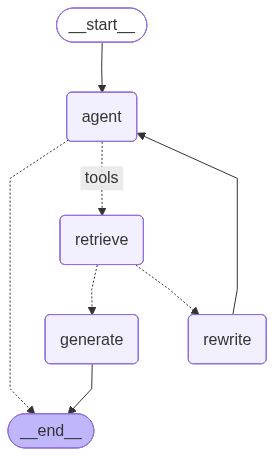

In [123]:
builder =StateGraph(AgentState)

builder.add_node("agent",agent)

retrieve =ToolNode([retriever_langchain_tool,retreiver_langgraph_tool])
builder.add_node("retrieve",retrieve)

builder.add_node("rewrite", rewrite)  # Re-writing the question
builder.add_node("generate", generate)

builder.add_edge(START, "agent")

builder.add_conditional_edges("agent",tools_condition,{
    "tools":"retrieve",
    END:END})

builder.add_conditional_edges("retrieve",
grade_documents)

builder.add_edge("generate",END)
builder.add_edge("rewrite","agent")

# Compile
graph = builder.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [124]:
graph.invoke({"messages":"What is Langgraph?"})

--CALL AGENT--


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='3cfddf26-dbcb-4fa3-b38e-95ea2cd95a6c'),
  AIMessage(content='**LangGraph** is an open‑source library (maintained by the LangChain team) that makes it easy to build **stateful, graph‑driven applications powered by LLMs**.  \n\nThink of it as a thin “orchestration layer” on top of LangChain that lets you describe **complex, multi‑step workflows as directed graphs** where each node is a piece of logic (often a LangChain component) and the edges define how execution moves from one step to the next, possibly based on the current **state**.\n\n---\n\n## Why LangGraph?\n\n| Problem in traditional LLM apps | How LangGraph helps |\n|--------------------------------|----------------------|\n| **Linear, hard‑coded pipelines** (e.g., prompt → LLM → post‑process) become messy when you need loops, conditionals, or parallel branches. | You declaratively draw a graph: nodes → edges, and the engine 

In [129]:
graph.invoke({"messages":"What is Langchain?"})

--CALL AGENT--


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='98af6fab-eb52-4851-b715-3a628e984623'),
  AIMessage(content='**LangChain** is an open‑source framework that makes it easier to build applications powered by large language models (LLMs).  \nInstead of writing raw API calls and glue code yourself, LangChain gives you reusable building blocks and higher‑level abstractions so you can focus on the *logic* of your product.\n\n| **What LangChain Provides** | **Why It Matters** |\n|-----------------------------|--------------------|\n| **LLM wrappers** – unified interfaces for OpenAI, Anthropic, Cohere, HuggingFace, Azure, etc. | Swap models or providers with a single line change. |\n| **Prompt templates & management** – variable substitution, few‑shot examples, chat‑history handling. | Keep prompts clean, versioned, and reusable. |\n| **Chains** – sequential pipelines that connect prompts, LLM calls, and other utilities (e.g., parsing, po

Below is prompt's that is available pre thing u can pull from

In [125]:
from langsmith import Client

client = Client()
prompt = client.pull_prompt("rlm/rag-prompt")
print(prompt)

input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


In [126]:
print(prompt.messages[0].prompt.template)


You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [127]:
items = client.list_prompts()
print(items)


repos=[Prompt(repo_handle='survey_question_from_user_context', description='', readme='', id='213c6d85-cb17-45c6-ab16-51214b17a74d', tenant_id='b20df7aa-3d37-4600-a966-6ac9051cc6b4', created_at=datetime.datetime(2025, 4, 7, 0, 12, 22, 439873), updated_at=datetime.datetime(2026, 2, 10, 14, 43, 21, 188902), is_public=True, is_archived=False, tags=['ChatPromptTemplate'], original_repo_id=None, upstream_repo_id=None, owner='vivarium', full_name='vivarium/survey_question_from_user_context', num_likes=0, num_downloads=448, num_views=188, liked_by_auth_user=False, last_commit_hash='8f8c4ffc0f5f98fb1443f75028cbb43db91c39448df9326bf94a81a937972da8', num_commits=34, original_repo_full_name=None, upstream_repo_full_name=None), Prompt(repo_handle='woppi-orchestrator', description='', readme='', id='86800732-d0ae-48e8-8fd9-7068b2ffdb34', tenant_id='8a4f2176-06b1-41de-b9df-c410e34a291a', created_at=datetime.datetime(2026, 2, 2, 5, 28, 11, 862890), updated_at=datetime.datetime(2026, 2, 10, 13, 39, 2,

In [128]:
client.list_prompts(query="rag")


ListPromptsResponse(repos=[Prompt(repo_handle='sys_inst_rag_prompt', description='', readme='', id='785fdeb6-7f1c-4e62-ab42-6345557df539', tenant_id='4745ec4e-6362-4ef7-a4f2-d1a1b441a198', created_at=datetime.datetime(2026, 1, 9, 11, 58, 53, 693278), updated_at=datetime.datetime(2026, 1, 9, 12, 47, 55, 466911), is_public=True, is_archived=False, tags=['ChatPromptTemplate'], original_repo_id=None, upstream_repo_id=None, owner='brahma', full_name='brahma/sys_inst_rag_prompt', num_likes=0, num_downloads=4, num_views=6, liked_by_auth_user=False, last_commit_hash='ba606726663436c80aaa414d19aba5a522ebe80a3782e0e345c14aa827a7097e', num_commits=1, original_repo_full_name=None, upstream_repo_full_name=None), Prompt(repo_handle='rag-prompt-korean', description='', readme='', id='8c919690-5f19-4272-9ba0-ae76c9dbb743', tenant_id='4efddcb5-b4f8-49cd-800f-c9d721294d85', created_at=datetime.datetime(2026, 1, 7, 9, 14, 29, 60600), updated_at=datetime.datetime(2026, 1, 7, 10, 19, 47, 2478), is_public=T